In [2]:
path= '\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Daten\\'
path2='\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Ergebnisse\\'

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
data=np.genfromtxt(path+'tlwia2018-07-24_f0001-Replicate.txt', skip_header=11) #Daten importieren

In [4]:
#Massen alle in g
Gefäß=432.49

m=[936.80, 905.78, 861.85, 811.91, 767.06, 720.50, 666.32, 613.66]

merror=0.2 #Fehler gilt für alle Messungen

In [5]:
#Berechne verbliebenden Wasseranteil
waterfrac=[] #leeres Array
waterfracerror=[]

for i in range(1, len(m)):
    w=(m[i]-Gefäß)/(m[0]-Gefäß)
    werror=np.sqrt((merror/(m[0]-Gefäß)**2+((m[i]-Gefäß)*merror/(m[0]-Gefäß)**2)**2+((m[0]-m[i])*merror/(m[0]-Gefäß)**2)**2))
    waterfrac=np.append(waterfrac, w)
    waterfracerror=np.append(waterfracerror, werror)

In [6]:
name=data[:,0]

D=data[:,1] #Deuterium
Derror=data[:,2]
np.nan_to_num(Derror, copy=False) #wegen zu wenig Daten kann für einen Wert kein Fehler berechnet werden, dieser wird durch 0 ersetz

O18=data[:,3]
O18error=data[:,4]
np.nan_to_num(O18error, copy=False)

O17=data[:,5]
O17error=data[:,6]
np.nan_to_num(O17error, copy=False)

array([0.056, 0.344, 0.785, 1.088, 0.162, 0.175, 0.134])

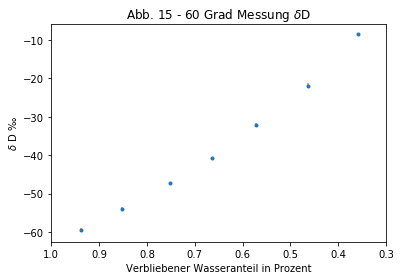

In [7]:
plt.plot(waterfrac, D, '.')
plt.errorbar(waterfrac, D, xerr=waterfracerror, yerr=Derror, linestyle='None')

plt.xlim(1, 0.3) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ D ‰')
plt.xlabel('Verbliebener Wasseranteil in Prozent')
plt.title('Abb. 15 - 60 Grad Messung $\delta$D')
plt.savefig(path2+'Abb15.png')

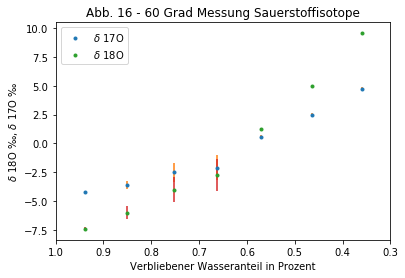

In [8]:
plt.plot(waterfrac, O17, '.',label='$\delta$ 17O')
plt.errorbar(waterfrac, O17, xerr=waterfracerror, yerr=O17error, linestyle='None')

plt.plot(waterfrac, O18, '.', label='$\delta$ 18O')
plt.errorbar(waterfrac, O18, xerr=waterfracerror, yerr=O18error, linestyle='None')
plt.xlim(1, 0.3) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ 18O ‰, $\delta$ 17O ‰')
plt.xlabel('Verbliebener Wasseranteil in Prozent')
plt.legend()
plt.title('Abb. 16 - 60 Grad Messung Sauerstoffisotope')
plt.savefig(path2+'Abb16.png')

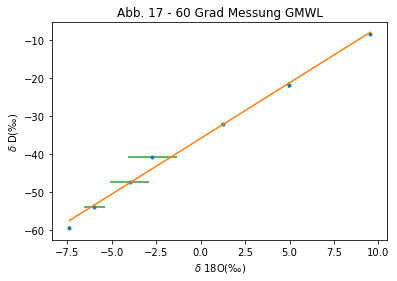

In [9]:
#GMWL

#Fitgerade
def line(x, a, b): 
    return a * x + b
popt, pcov = curve_fit(line, O18, D)

#Plot erstellen

plt.plot(O18, D, '.')
plt.plot(O18,line(O18, *popt))
plt.errorbar (O18, D, xerr=O18error, yerr=Derror, linestyle='None')

plt.ylabel('$\delta$ D(‰)')
plt.xlabel('$\delta$ 18O(‰)')
plt.title('Abb. 17 - 60 Grad Messung GMWL')
plt.savefig(path2+'Abb17.png')

In [10]:
#Fitparameter
print("a =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("b =", popt[1], "+/-", pcov[1,1]**0.5) #in Promill

a = 2.924899547940748 +/- 0.10887897614917365
b = -35.902566210923716 +/- 0.6253636939204218


delta0 = -0.06217355446950254 +/- 0.0003108201375308831
epsilon = -0.05473289758478973 +/- 0.0005762357339969661
alpha = 0.9999452671024152 +/- 5.76235733996966e-07


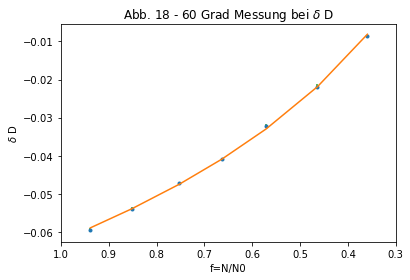

In [11]:
#Fraktionierungs Faktor Alpha - Wasserstoff
f=waterfrac
ferror=waterfracerror

def delta(f, delta0, epsilon):
    return (1+delta0)*((f)**(epsilon))-1

popt, pcov = curve_fit(delta, f, D/1000)

plt.plot(f, D/1000, '.')
plt.plot(f,delta(f, *popt))
plt.errorbar (f, D/1000, xerr=ferror, yerr=Derror/1000, linestyle='None')
plt.xlim(1, 0.3) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ D')
plt.xlabel('f=N/N0')
plt.title('Abb. 18 - 60 Grad Messung bei $\delta$ D')
plt.savefig(path2+'Abb18.png')

#Fitparameter
print("delta0 =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("epsilon =", popt[1], "+/-", pcov[1,1]**0.5) 

alpha=popt[1]/1000+1
alphaerror=(pcov[1,1]**0.5)/1000
print("alpha =", alpha, "+/-", alphaerror)

delta0 = -0.005179605174349063 +/- 0.0003190399791059797
epsilon = -0.009704957816769385 +/- 0.000566089874067562
alpha = 0.9999902950421833 +/- 5.66089874067562e-07


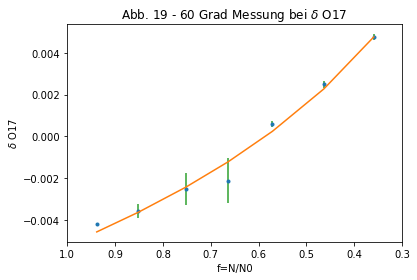

In [14]:
#Fraktionierungs Faktor Alpha - Sauerstoff17
f=waterfrac
ferror=waterfracerror

def delta(f, delta0, epsilon):
    return (1+delta0)*((f)**(epsilon))-1


popt, pcov = curve_fit(delta, f, O17/1000)

plt.plot(f, O17/1000, '.')
plt.plot(f,delta(f, *popt))
plt.errorbar (f, O17/1000, xerr=ferror, yerr=O17error/1000, linestyle='None')
plt.xlim(1, 0.3) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ O17')
plt.xlabel('f=N/N0')
plt.title('Abb. 19 - 60 Grad Messung bei $\delta$ O17 ')
plt.savefig(path2+'Abb19.png')

#Fitparameter
print("delta0 =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("epsilon =", popt[1], "+/-", pcov[1,1]**0.5)

alpha=popt[1]/1000+1
alphaerror=(pcov[1,1]**0.5)/1000
print("alpha =", alpha, "+/-", alphaerror)

delta0 = -0.00899161054474776 +/- 0.0003608618595575652
epsilon = -0.01795460550274471 +/- 0.0006409721113517568
alpha = 0.9999820453944973 +/- 6.409721113517567e-07


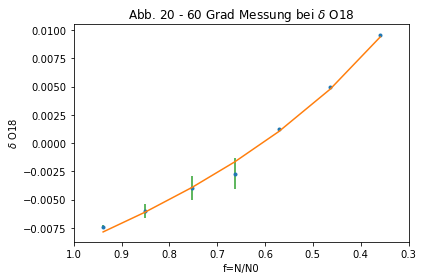

In [15]:
#Fraktionierungs Faktor Alpha - Sauerstoff18
f=waterfrac
ferror=waterfracerror

def delta(f, delta0, epsilon):
    return ((1+delta0)*((f)**(epsilon)))-1


popt, pcov = curve_fit(delta, f, O18/1000)

plt.plot(f, O18/1000, '.')
plt.plot(f,delta(f, *popt))
plt.errorbar (f, O18/1000, xerr=ferror, yerr=O18error/1000, linestyle='None')
plt.xlim(1, 0.3) #Von größerer zu kleiner x-Achse

plt.ylabel('$\delta$ O18')
plt.xlabel('f=N/N0')
plt.title('Abb. 20 - 60 Grad Messung bei $\delta$ O18')
plt.savefig(path2+'Abb20.png')

#Fitparameter
print("delta0 =", popt[0], "+/-", pcov[0,0]**0.5) #in Promill
print("epsilon =", popt[1], "+/-", pcov[1,1]**0.5) 

alpha=popt[1]/1000+1
alphaerror=(pcov[1,1]**0.5)/1000
print("alpha =", alpha, "+/-", alphaerror)